# Try mRMR selection for SVM
MSc in Statistical Science\
University of Oxford\
Group-assessed practical\
HT 2024

In [1]:
# Import libraries
import pandas as pd
import numpy as np
from search_param.grid_search import read_data, decode_dict, grid_search, rand_search
from fit_models import fit_model
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
import shutil
import json
import time
import mrmr
from sklearn.svm import SVC

In [2]:
pipeline = Pipeline([
    ('classifier', SVC())
])

## Scaling

In [3]:
X_train, X_val, y_train, y_val = read_data()

In [4]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Fit label encoder and return encoded labels
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

In [5]:
# Standard scaling
scaler = StandardScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)
X_val_sc = scaler.transform(X_val)

In [6]:
X = pd.DataFrame(X_train_sc)
y = pd.DataFrame(y_train_encoded)

## Apply random search

In [10]:
param_grid = [{'classifier__C': [0.01, 0.1, 1, 10, 100],
               'classifier__kernel': ['poly'],
               'classifier__degree': [0, 1, 2, 3, 4, 5],
               'classifier__gamma': ['scale', 'auto']},
              {'classifier__C': [0.01, 0.1, 1, 10, 100],
               'classifier__kernel': ['rbf', 'sigmoid'],
               'classifier__gamma': ['scale', 'auto']}]

In [9]:
best_params = {}

In [23]:
for k in range(50, 501, 50):
    # apply feature selection
    selected_features  = mrmr.mrmr_classif(X=X, y=y, K=k)
    X_train_selected = X_train_sc[:, selected_features]
    X_val_selected = X_val_sc[:, selected_features]

    # apply random search
    k_best = rand_search(pipeline, param_grid,
        X_train_selected, y_train_encoded, X_val_selected, y_val_encoded, cv_n=5, n=10)
    
    # save the best parameters
    best_params[str(k)] = k_best
    print(f'\nUsing {k} features, the best parameters are\n', k_best)
    

100%|██████████| 50/50 [00:13<00:00,  3.61it/s]


Fitting 5 folds for each of 10 candidates, totalling 50 fits
The best parameters are
 {'classifier__kernel': 'rbf', 'classifier__gamma': 'auto', 'classifier__C': 1}

Using 50 features, the best parameters are
 {'classifier__kernel': 'rbf', 'classifier__gamma': 'auto', 'classifier__C': 1, 'val_score': 0.5491666666666667}


100%|██████████| 100/100 [00:26<00:00,  3.75it/s]


Fitting 5 folds for each of 10 candidates, totalling 50 fits
The best parameters are
 {'classifier__kernel': 'rbf', 'classifier__gamma': 'auto', 'classifier__C': 1}

Using 100 features, the best parameters are
 {'classifier__kernel': 'rbf', 'classifier__gamma': 'auto', 'classifier__C': 1, 'val_score': 0.5883333333333334}


100%|██████████| 150/150 [00:39<00:00,  3.84it/s]


Fitting 5 folds for each of 10 candidates, totalling 50 fits
The best parameters are
 {'classifier__kernel': 'rbf', 'classifier__gamma': 'auto', 'classifier__C': 1}

Using 150 features, the best parameters are
 {'classifier__kernel': 'rbf', 'classifier__gamma': 'auto', 'classifier__C': 1, 'val_score': 0.5983333333333334}


100%|██████████| 200/200 [00:51<00:00,  3.89it/s]


Fitting 5 folds for each of 10 candidates, totalling 50 fits
The best parameters are
 {'classifier__kernel': 'rbf', 'classifier__gamma': 'auto', 'classifier__C': 1}

Using 200 features, the best parameters are
 {'classifier__kernel': 'rbf', 'classifier__gamma': 'auto', 'classifier__C': 1, 'val_score': 0.5925}


100%|██████████| 250/250 [01:01<00:00,  4.10it/s]


Fitting 5 folds for each of 10 candidates, totalling 50 fits
The best parameters are
 {'classifier__kernel': 'rbf', 'classifier__gamma': 'auto', 'classifier__C': 1}

Using 250 features, the best parameters are
 {'classifier__kernel': 'rbf', 'classifier__gamma': 'auto', 'classifier__C': 1, 'val_score': 0.6083333333333333}


100%|██████████| 300/300 [01:11<00:00,  4.18it/s]


Fitting 5 folds for each of 10 candidates, totalling 50 fits
The best parameters are
 {'classifier__kernel': 'rbf', 'classifier__gamma': 'auto', 'classifier__C': 1}

Using 300 features, the best parameters are
 {'classifier__kernel': 'rbf', 'classifier__gamma': 'auto', 'classifier__C': 1, 'val_score': 0.6116666666666667}


100%|██████████| 350/350 [01:14<00:00,  4.69it/s]


Fitting 5 folds for each of 10 candidates, totalling 50 fits
The best parameters are
 {'classifier__kernel': 'rbf', 'classifier__gamma': 'auto', 'classifier__C': 1}

Using 350 features, the best parameters are
 {'classifier__kernel': 'rbf', 'classifier__gamma': 'auto', 'classifier__C': 1, 'val_score': 0.6108333333333333}


100%|██████████| 400/400 [01:19<00:00,  5.02it/s]


Fitting 5 folds for each of 10 candidates, totalling 50 fits
The best parameters are
 {'classifier__kernel': 'rbf', 'classifier__gamma': 'auto', 'classifier__C': 1}

Using 400 features, the best parameters are
 {'classifier__kernel': 'rbf', 'classifier__gamma': 'auto', 'classifier__C': 1, 'val_score': 0.6033333333333334}


100%|██████████| 450/450 [01:18<00:00,  5.74it/s]


Fitting 5 folds for each of 10 candidates, totalling 50 fits
The best parameters are
 {'classifier__kernel': 'rbf', 'classifier__gamma': 'auto', 'classifier__C': 1}

Using 450 features, the best parameters are
 {'classifier__kernel': 'rbf', 'classifier__gamma': 'auto', 'classifier__C': 1, 'val_score': 0.6016666666666667}


100%|██████████| 500/500 [01:20<00:00,  6.23it/s]


Fitting 5 folds for each of 10 candidates, totalling 50 fits
The best parameters are
 {'classifier__kernel': 'rbf', 'classifier__gamma': 'auto', 'classifier__C': 1}

Using 500 features, the best parameters are
 {'classifier__kernel': 'rbf', 'classifier__gamma': 'auto', 'classifier__C': 1, 'val_score': 0.5983333333333334}


## Apply grid search

In [24]:
param_grid = {'classifier__C': [0.01, 0.1, 1, 10, 100],
              'classifier__kernel': ['rbf'],
              'classifier__gamma': ['scale', 'auto']}

In [26]:
for k in range(200, 401, 50):
    # apply feature selection
    selected_features  = mrmr.mrmr_classif(X=X, y=y, K=k)
    X_train_selected = X_train_sc[:, selected_features]
    X_val_selected = X_val_sc[:, selected_features]

    # apply random search
    k_best = grid_search(pipeline, param_grid,
        X_train_selected, y_train_encoded, X_val_selected, y_val_encoded)
    
    # save the best parameters
    best_params[str(k)] = k_best
    print(f'\nUsing {k} features, the best parameters are\n', k_best)

100%|██████████| 200/200 [00:51<00:00,  3.91it/s]


Fitting 5 folds for each of 10 candidates, totalling 50 fits
The best parameters are
 {'classifier__C': 1, 'classifier__gamma': 'scale', 'classifier__kernel': 'rbf'}

Using 200 features, the best parameters are
 {'classifier__C': 1, 'classifier__gamma': 'scale', 'classifier__kernel': 'rbf', 'val_score': 0.5925}


100%|██████████| 250/250 [01:02<00:00,  4.01it/s]


Fitting 5 folds for each of 10 candidates, totalling 50 fits
The best parameters are
 {'classifier__C': 100, 'classifier__gamma': 'scale', 'classifier__kernel': 'rbf'}

Using 250 features, the best parameters are
 {'classifier__C': 100, 'classifier__gamma': 'scale', 'classifier__kernel': 'rbf', 'val_score': 0.6158333333333333}


100%|██████████| 300/300 [01:10<00:00,  4.23it/s]


Fitting 5 folds for each of 10 candidates, totalling 50 fits
The best parameters are
 {'classifier__C': 100, 'classifier__gamma': 'scale', 'classifier__kernel': 'rbf'}

Using 300 features, the best parameters are
 {'classifier__C': 100, 'classifier__gamma': 'scale', 'classifier__kernel': 'rbf', 'val_score': 0.6158333333333333}


100%|██████████| 350/350 [01:15<00:00,  4.63it/s]


Fitting 5 folds for each of 10 candidates, totalling 50 fits
The best parameters are
 {'classifier__C': 10, 'classifier__gamma': 'auto', 'classifier__kernel': 'rbf'}

Using 350 features, the best parameters are
 {'classifier__C': 10, 'classifier__gamma': 'auto', 'classifier__kernel': 'rbf', 'val_score': 0.62}


100%|██████████| 400/400 [01:17<00:00,  5.15it/s]


Fitting 5 folds for each of 10 candidates, totalling 50 fits
The best parameters are
 {'classifier__C': 10, 'classifier__gamma': 'auto', 'classifier__kernel': 'rbf'}

Using 400 features, the best parameters are
 {'classifier__C': 10, 'classifier__gamma': 'auto', 'classifier__kernel': 'rbf', 'val_score': 0.6175}


## Fix one group of parameters

In [14]:
selected_features  = mrmr.mrmr_classif(X=X, y=y, K=500)

100%|██████████| 500/500 [01:22<00:00,  6.07it/s]


In [15]:
param = {"C": 10, "gamma": "scale", "kernel": "rbf"}
train_acc = []
val_acc = []

In [21]:
for k in range(50, 501, 50):
    X_train_selected = X_train_sc[:, selected_features[:k]]
    X_val_selected = X_val_sc[:, selected_features[:k]]

    svm = SVC()
    svm.set_params(**param)
    svm.fit(X_train_selected, y_train_encoded)

    # Get train accuracy and predicted y
    y_train_pred = svm.predict(X_train_selected)
    train_acc.append(accuracy_score(y_train_encoded, y_train_pred))
    
    # Get test accuracy and predicted y
    y_val_pred = svm.predict(X_val_selected)
    val_acc.append(accuracy_score(y_val_encoded, y_val_pred))

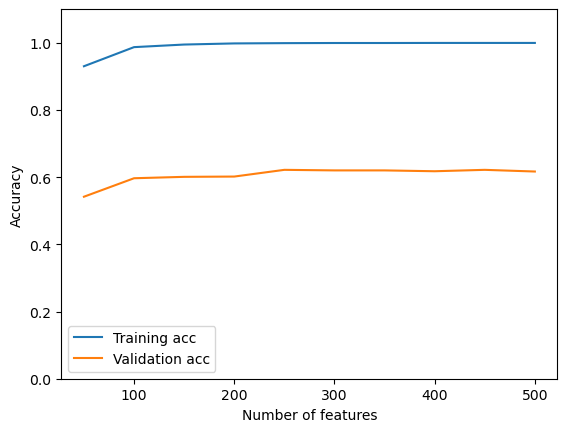

In [24]:
import matplotlib.pyplot as plt


plt.plot(range(50, 501, 50), train_acc, label='Training acc')
plt.plot(range(50, 501, 50), val_acc, label='Validation acc')
plt.ylim(0, 1.1)
plt.legend()
plt.xlabel('Number of features')
plt.ylabel('Accuracy')
plt.title('')
plt.show()